In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
file_name = 'realistic_housing_data.xlsx'
df = pd.read_excel(file_name)


In [3]:
print(f"\n Dataset Shape: {df.shape}")
print(f"\n Dataset Columns: {df.columns.tolist()}")


 Dataset Shape: (5000, 15)

 Dataset Columns: ['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built', 'garage', 'location', 'house_type', 'condition', 'has_pool', 'has_fireplace', 'has_basement', 'school_rating', 'price']


In [4]:
df.shape

(5000, 15)

In [5]:
print(f'feature:{df.columns}')

feature:Index(['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built',
       'garage', 'location', 'house_type', 'condition', 'has_pool',
       'has_fireplace', 'has_basement', 'school_rating', 'price'],
      dtype='object')


In [6]:
df.head()

,bedrooms,bathrooms,sqft,lot_size,age,year_built,garage,location,house_type,condition,has_pool,has_fireplace,has_basement,school_rating,price
0,3,5,2229,12569,38,1986,1,Rural,Condo,4,0,1,0,10,199148
1,3,2,1897,8942,27,1997,3,Rural,Townhouse,3,0,0,1,3,152932
2,4,2,2397,4826,46,1978,0,Downtown,Townhouse,2,0,0,0,6,230854
3,5,3,2849,2490,39,1985,2,Hills,House,3,0,1,1,4,263271
4,2,3,1895,11910,41,1983,1,Downtown,Townhouse,4,0,0,0,5,274804


In [7]:
print("Info")
print(df.info())

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedrooms       5000 non-null   int64 
 1   bathrooms      5000 non-null   int64 
 2   sqft           5000 non-null   int64 
 3   lot_size       5000 non-null   int64 
 4   age            5000 non-null   int64 
 5   year_built     5000 non-null   int64 
 6   garage         5000 non-null   int64 
 7   location       5000 non-null   object
 8   house_type     5000 non-null   object
 9   condition      5000 non-null   int64 
 10  has_pool       5000 non-null   int64 
 11  has_fireplace  5000 non-null   int64 
 12  has_basement   5000 non-null   int64 
 13  school_rating  5000 non-null   int64 
 14  price          5000 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 586.1+ KB
None


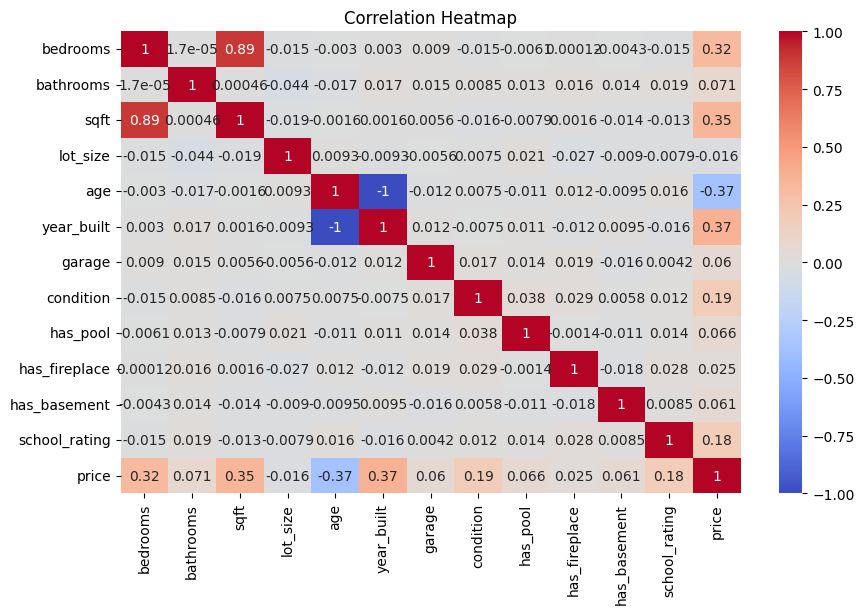

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
x = df.drop('price', axis=1)
y = df['price']

In [10]:
categorical_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns

In [11]:
print(categorical_features)
print(numerical_features)

Index(['location', 'house_type'], dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built',
       'garage', 'condition', 'has_pool', 'has_fireplace', 'has_basement',
       'school_rating'],
      dtype='object')


In [12]:
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ("scale", StandardScaler(), numerical_features)
])

In [13]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [14]:
#print(preprocessor, Pipeline)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
pipeline.fit(x_train, y_train)

c:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:830: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  check_classification_targets(y)
c:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:297: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  check_classification_targets(y)
c:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:297: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  check_classification_targets(y)
c:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:297: Use

MemoryError: could not allocate 261160960 bytes

In [ ]:
y_pred = pipeline.predict(x_test)

In [ ]:
mean = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

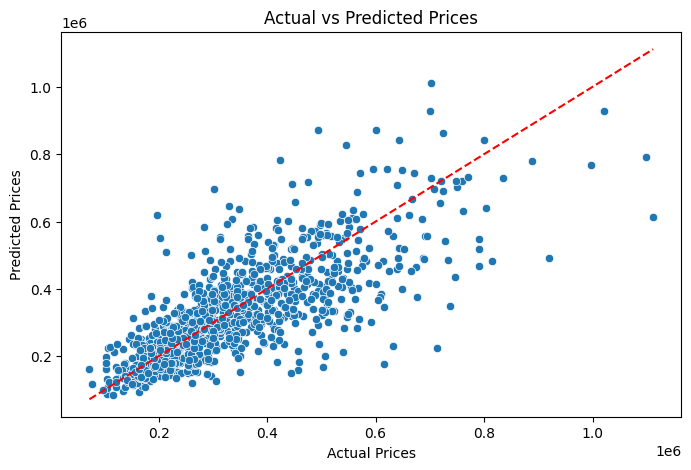

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()